# Проект : "Анализ оттока клиентов банка"

## Предобрадотка данных

### Откроем данные и изучим основную информацию о них

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Загрузим библиотеки, необходимые для дальнейшей работы
import pandas as pd
import datetime as dt
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as st
from statsmodels. stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency, fisher_exact
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import math as mth
import folium
from folium import Marker, Map
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)
display(df.head(10))
display(df.info())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


None

**Тип данных соответствует содержанию ячеек. Некоторые столбцы нужно переименовать, пропуски в столбце с балансом счёта обработать.**

### Приведем названия стобцов единому стилю

In [4]:
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'salary'}) 
display(df.head(10))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0


### Проверим данные на отсутсвие аномальных значений 

#### Посмотрим, есть ли клиенты млаше 14 лет

In [5]:
display('Количество клиентов - детей:', df.query('age <14')['user_id'].count())

'Количество клиентов - детей:'

0

#### Посмотрим, есть ли  у клиентов отрицательные заработные платы

In [6]:
display('Количество клиентов с отрицательными заработными платами', df.query('salary <0')['user_id'].count())

'Количество клиентов с отрицательными заработными платами'

0

#### Посмотрим, есть ли клиенты с отрицательной оценкой собственности

In [7]:
display('Количество клиентов с отрицательной оценкой собственности', df.query('equity <0')['user_id'].count())

'Количество клиентов с отрицательной оценкой собственности'

0

#### Посмотрим, какие названия городов встречаются, нет ли вымышленных)

In [8]:
display('Есть данные по городам:', df['city'].unique())

'Есть данные по городам:'

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

**Явных аномалий в значениях нет**

 ### Проверим наличие дубликатов и удалим их в случае необходимости 

In [9]:
display ('Количество явных дубликатов:',df.duplicated().sum())

'Количество явных дубликатов:'

1

In [10]:
#Удалим повторяющуюся строку
df = df.drop_duplicates()
display ('Количество явных дубликатов:',df.duplicated().sum())

'Количество явных дубликатов:'

0

#### Посмотрим, не встречаются ли дубликаты уникальных пользовательских id

In [11]:
display('Количество повторяющихся уникальных пользовательских id:', df['user_id'].duplicated().sum())

'Количество повторяющихся уникальных пользовательских id:'

72

In [12]:
#Проверим дубликаты по совпадению столбцов id и города
df[df[['user_id', 'city']].duplicated(keep=False)]
display('Количество дублированных строк по совпадению id и города',df[df[['user_id', 'city']].duplicated(keep=False)]['user_id'].count())


'Количество дублированных строк по совпадению id и города'

70

In [13]:
# Будем думать, что данные в других столбцах были внесены неправильно и речь всё таки идёт об одном и том же клиенте. Удалим повторяющиеся строки
df = df.drop_duplicates(subset=['user_id', 'city'], keep='first')
display('Количество повторяющихся уникальных пользовательских id:', df['user_id'].duplicated().sum())


'Количество повторяющихся уникальных пользовательских id:'

37

In [14]:
display(df[df['user_id'].isin(df['user_id'][df['user_id'].duplicated()])].sort_values('user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7814,210792,839.0,Ярославль,М,42,2,662646.97,1,1,0,138403.60,0
7409,214031,777.0,Ростов,М,53,2,171510.23,1,1,1,75409.63,0
431,214031,856.0,Рыбинск,М,36,2,386426.67,4,1,1,72767.85,0
5807,217619,766.0,Ярославль,М,52,2,218199.47,1,1,0,120356.44,0


**Если считать, что один и тот же человек с уникальным id может быть клиентом банка в разных городах, то 37 оставшихся дубликатов id - такой случай. Оставим их**

In [15]:
df = df.drop_duplicates(subset=['user_id'], keep='first')
display('Количество повторяющихся уникальных пользовательских id:', df['user_id'].duplicated().sum())

'Количество повторяющихся уникальных пользовательских id:'

0

### Изучим пропуски

In [16]:
display('Процент пропусков значений в столбце с балансом счёта', round((df['balance'].isnull().sum())/len(df)*100,2))

'Процент пропусков значений в столбце с балансом счёта'

22.77

**Пропуски встречаются только в столбце с балансом счёта. Данных для их заполнения взять негде. Удалять строки не будем, так как количество пропусков довольно существенно.Оставим как есть**

### Добавим столбец с возрастной категорией для дальнейшего исследования

In [17]:
df['age_category'] = pd.cut(df['age'], [0,35, 60, np.inf], labels=['молодежь','взрослые','пенсионеры'])
display(df.head(10))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,age_category
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,молодежь
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,взрослые
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,молодежь
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,взрослые
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,молодежь
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,взрослые
6,177259,807.0,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,взрослые
7,218868,825.0,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,взрослые
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,взрослые
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,пенсионеры


In [18]:
#Посмотрим, какие значения есть у столбца ч кредитным скорингом
display('Значения кредитного скоринга', df['score'].unique())

'Значения кредитного скоринга'

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

In [19]:
# Разобьем клиентов на группы в зависимости от кредитного скоринга для дальнейшего анализа
df['score_cat'] = pd.cut(df['score'], [600,700, 800,900, np.inf], labels=[1,2,3,4])
display(df.head(10))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,age_category,score_cat
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,молодежь,3
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,взрослые,3
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,молодежь,3
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,взрослые,3
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,молодежь,2
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,взрослые,3
6,177259,807.0,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,взрослые,3
7,218868,825.0,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,взрослые,3
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,взрослые,4
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,пенсионеры,4


**Данные проверены, обработаны и готовы к дальнейшему анализу**

## Исследовательский анализ данных

In [20]:
#Установаим стиль графиков для оформления исследования
sns.set_palette('Set3')
sns.set_style('white')

### Посмотрим в общем - сколько клиентов ушло и сколько не активно в последнее время

#### Всего

In [21]:
display('Количество ушедших клиентов, всего',df.query('churn == 1')['user_id'].count())
display ('% ушедших клиентов от общего количества',round(df.query('churn == 1')['user_id'].count()/df['user_id'].count()*100, 2))

'Количество ушедших клиентов, всего'

1821

'% ушедших клиентов от общего количества'

18.34

In [22]:
display('Количество неактивных клиентов, всего',df.query('last_activity == 0')['user_id'].count())
display ('% неактивных клиентов от общего количества',round(df.query('last_activity == 0')['user_id'].count()/df['user_id'].count()*100, 2))

'Количество неактивных клиентов, всего'

4730

'% неактивных клиентов от общего количества'

47.65

last_activity,0,1
churn,,
0,4188,3918
1,542,1279


'Коэффициент ассоциации'

0.4322048853423686

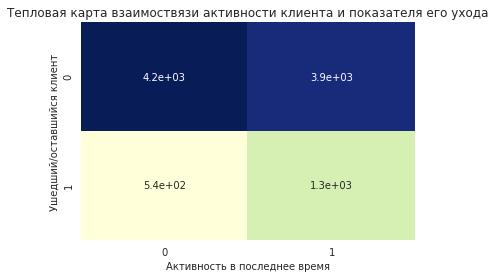

In [23]:
#Корреляция между ушедшими и неактивными пользователями
crs_t = pd.crosstab(df['churn'],df['last_activity'])
display(crs_t)
sns.heatmap(pd.crosstab(df['churn'], df['last_activity']), 
            cmap="YlGnBu", annot=True, cbar=False);
plt.xlabel('Активность в последнее время')
plt.ylabel('Ушедший/оставшийся клиент')
plt.title('Тепловая карта взаимоствязи активности клиента и показателя его ухода')
# Посчитаем коэффициент ассоциации:
display('Коэффициент ассоциации',(crs_t.loc[0,0]*crs_t.loc[1,1] -crs_t.loc[0,1]*crs_t.loc[1,0])/(crs_t.loc[0,0]*crs_t.loc[1,1] +crs_t.loc[0,1]*crs_t.loc[1,0]) )





**Так как коэффициент ассоциации меньше 0,5 - не слудеует говорить о связи между количеством неактивных и ушедших пользователей**

In [24]:
# Найдём коэффициент х^2
display(chi2_contingency(pd.crosstab(df['churn'], df['last_activity'])))
#Проведем тест Фишера
fisher_exact(pd.crosstab(df['churn'], df['last_activity']))

(285.0601492283511,
 5.9283865626834825e-64,
 1,
 array([[3862.33303113, 4243.66696887],
        [ 867.66696887,  953.33303113]]))

(2.522397337296497, 8.181797395115026e-66)

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'salary', 'churn']


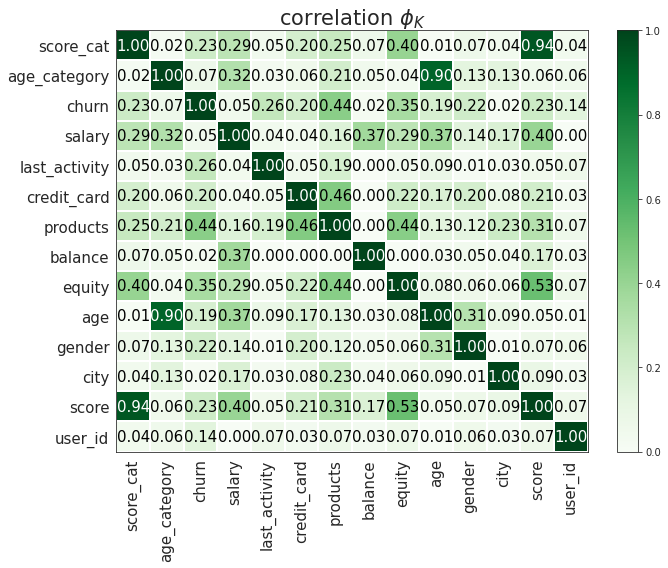

In [25]:

phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

**Процент ушедших пользователей больше 18 и количетсво неактивных пользователей стремиться к половине. Не утешающие показатели. Корреляция между неактивными пользователями и ушедшими практически отсутствует.Нельзя говорить об очень высоких рисках того, что неактивные пользователи уйдут.**

#### По городам

##### Количество уходов

'Количество ушедших клиентов по городам'

city
Ярославль    1121
Рыбинск       431
Ростов        269
Name: user_id, dtype: int64

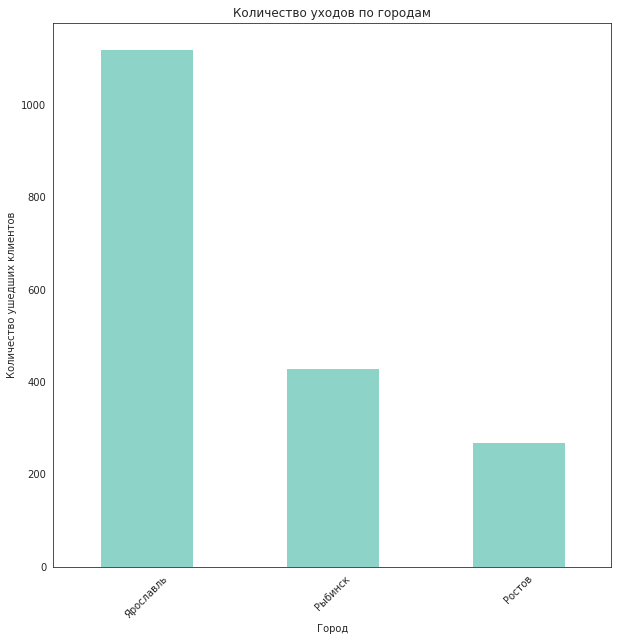

'% ушедших клиентов по городам'

city
Ярославль    19.12
Ростов       18.93
Рыбинск      16.31
Name: user_id, dtype: float64

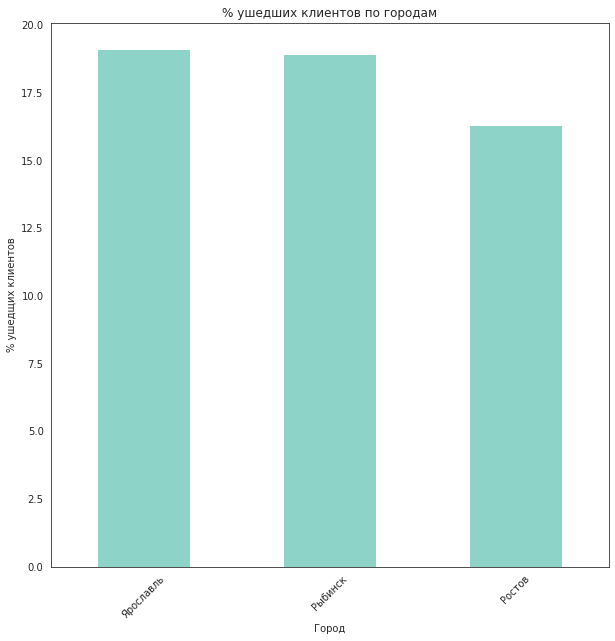

In [26]:
#Всего пользоватлей по городам
df_city_tot = df.groupby('city')['user_id'].count().sort_values(ascending = False)
#display(df_city_tot)
#Ушедших пользователей по городам
df_city = df.query('churn == 1').groupby('city')['user_id'].count().sort_values(ascending = False)
display('Количество ушедших клиентов по городам',df_city)
ax = df_city.plot(kind = 'bar', x = 'city',  figsize=(10,10), grid=False,title = 'Количество уходов по городам')
plt.xlabel('Город')
plt.ylabel('Количество ушедших клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()
#Относительное количество ушедших по городам
display('% ушедших клиентов по городам',round(df_city/df_city_tot*100,2).sort_values(ascending = False))
ax1= round(df_city/df_city_tot*100,2).sort_values(ascending = False).plot(kind = 'bar', x = 'city',  figsize=(10,10), grid=False,title = '% ушедших клиентов по городам')
plt.xlabel('Город')
plt.ylabel('% ушедщих клиентов')
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()



plt.show()


**Больше всего клиентов "теряется" В Ярославле - 1121 клиент из этого города ушёл. В абсолютных значениях потери в Рыбинске и Ростове сильно меньше - 432 и 269 клиентов соответственно. Но по относительным показателям, количетсво ушедших пользователей отличается мало: меньше всего ушедших в Ростове - чуть более 16%, больше всего - в Ярославле (19%), в Рыбинске потери очень близки к показателям Ярославля, но пока всё же чуть ниже  - около 18,8%.**

##### Количество неактивных клиентов

'Количество неактивных клиентов по городам'

city
Ярославль    2914
Рыбинск      1153
Ростов        663
Name: user_id, dtype: int64

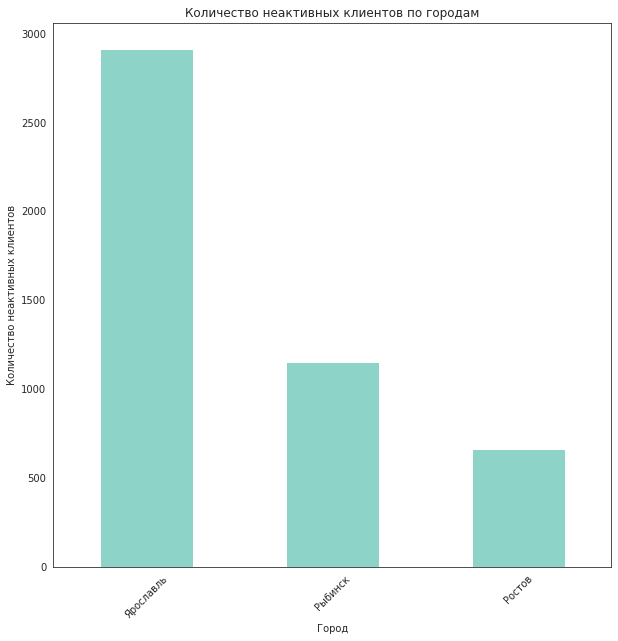

'% неактивных клиентов по городам'

city
Ярославль    49.69
Рыбинск      43.64
Ростов       46.66
Name: user_id, dtype: float64

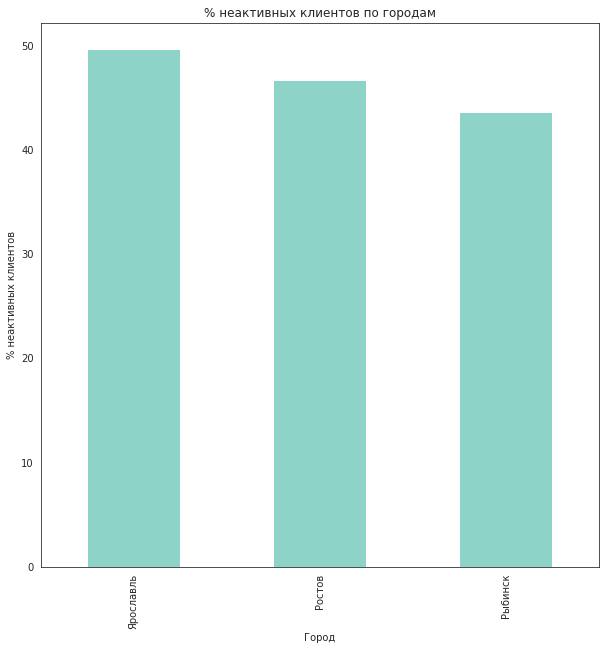

In [27]:
df_city1 = df.query('last_activity == 0').groupby('city')['user_id'].count().sort_values(ascending = False)

display('Количество неактивных клиентов по городам',df_city1)


ax = df_city1.plot(kind = 'bar', x = 'city',  figsize=(10,10), grid=False,title = 'Количество неактивных клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество неактивных клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()
#Относительное количество неактивных пльзователей по городам
display('% неактивных клиентов по городам',round(df_city1/df_city_tot*100,2))
ax1= round(df_city1/df_city_tot*100,2).sort_values(ascending = False).plot(kind = 'bar', x = 'city',  figsize=(10,10), grid=False,title = '% неактивных клиентов по городам')
plt.xlabel('Город')
plt.ylabel('% неактивных клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()


**Больше всего неактивных клиентов в Ярославле-  больше, чем в Рыбинске и Ростове вместе взятых. Процент неактивных пользователей в Ярославле так же выше, чем в двух других городах, но разница выражена совсем не так явно: всего на 3% отличается от показателя Ростова и на 6 относительно Рыбинска. Во всех городах процент неактивных пользователей выше 43%. Плохо**

#### В зависимости от возрастной категории

##### Ушедшие клиенты

'Количество ушедших клиентов с распределением по возрастным категориям'

age_category
взрослые      1068
молодежь       693
пенсионеры      60
Name: user_id, dtype: int64

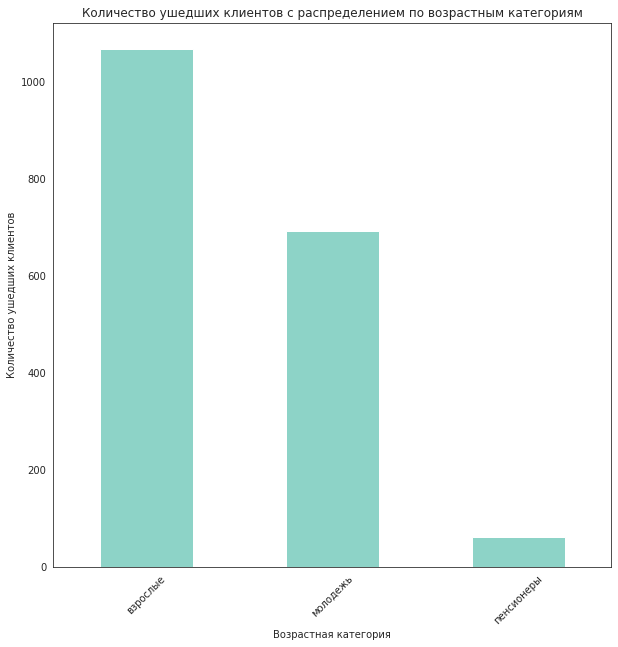

'% ушедших клиентов с распределением по возрастным категориям'

age_category
молодежь      21.36
взрослые      18.88
пенсионеры     5.85
Name: user_id, dtype: float64

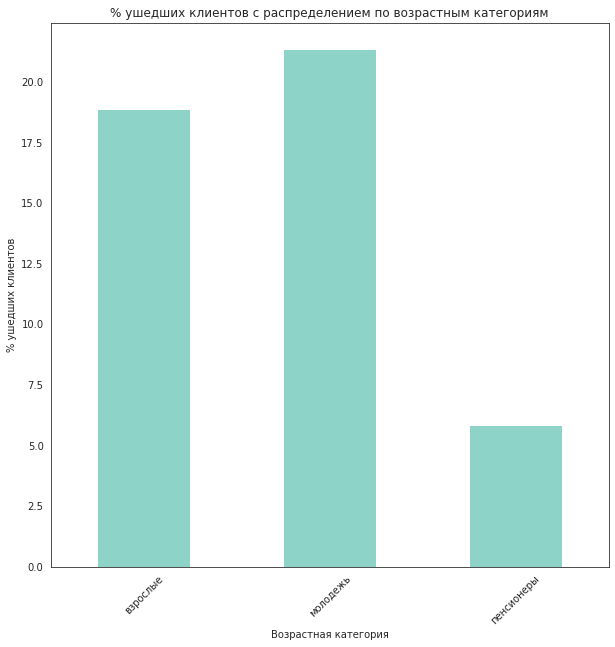

In [28]:

#Количество ушедших клиентов
df_age_tot  = df.groupby('age_category')['user_id'].count().sort_values(ascending = False)
#Абсолютные значения
df_age = df.query('churn == 1').groupby('age_category')['user_id'].count().sort_values(ascending = False)
display('Количество ушедших клиентов с распределением по возрастным категориям',df_age)
ax = df_age.plot(kind = 'bar', x = 'age_category',  figsize=(10,10), grid=False,title = 'Количество ушедших клиентов с распределением по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество ушедших клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()
# Относительные значения
display('% ушедших клиентов с распределением по возрастным категориям',round(df_age/df_age_tot*100,2).sort_values(ascending = False))
ax1 = round(df_age/df_age_tot*100,2).plot(kind = 'bar', x = 'age_category', figsize=(10,10), grid=False,title = '% ушедших клиентов с распределением по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('% ушедших клиентов')
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()


**В абсолютных величинах больше всего ушедших клиентов в овзрасте от 35 до 55 лет - 859 человек, меньше всего -пенсионеров(270 ушедших). Среди молодежи 693 человека перестали быть клиентами, не самый высокий показатель. Но, судя по относительным потерям, молодежь (клиенты до 35 лет) - самая высокая категория риска - более 21% ушедших. Взрослые кходят реже - чуть более 17%. Пенсионеры самые стабильные клиенты - процент ушедщих среди них чуть менее 15.**

##### Неактивные клиенты

'Количество неактивных клиентов с распределением по возрастным категориям'

age_category
взрослые      2811
молодежь      1470
пенсионеры     449
Name: user_id, dtype: int64

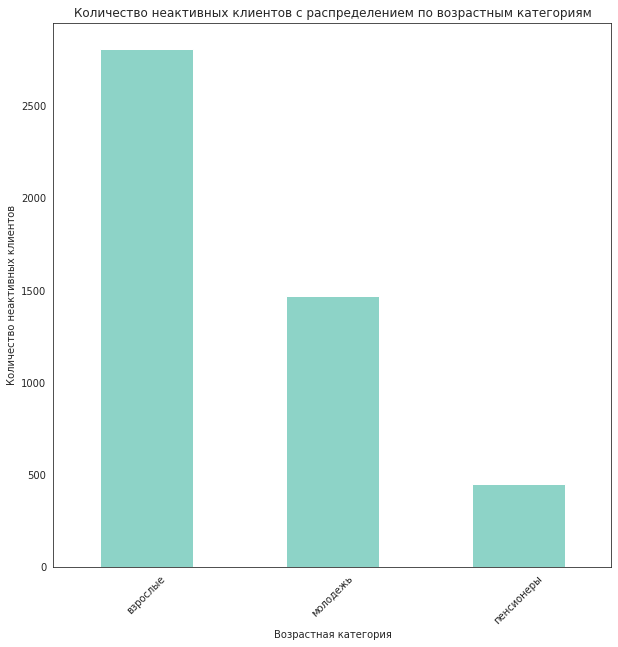

'% неактивных клиентов с распределением по возрастным категориям'

age_category
взрослые      49.69
молодежь      45.30
пенсионеры    43.80
Name: user_id, dtype: float64

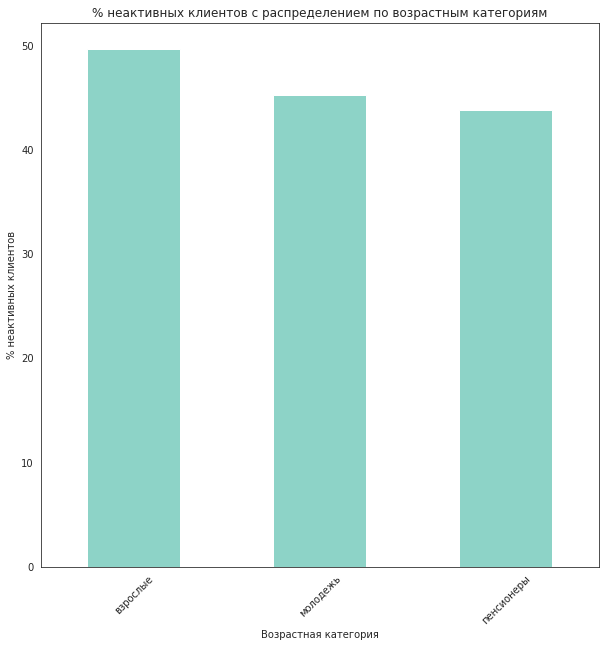

In [29]:
#Количество неактивных клиентов в абсолютных значениях
df_age1 = df.query('last_activity == 0').groupby('age_category')['user_id'].count().sort_values(ascending = False)
display('Количество неактивных клиентов с распределением по возрастным категориям',df_age1)
ax2 = df_age1.plot(kind = 'bar',figsize=(10,10), grid=False,title = 'Количество неактивных клиентов с распределением по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество неактивных клиентов')
ax2.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()
#Количество неактивных клиентов в относительных значениях
display('% неактивных клиентов с распределением по возрастным категориям',round(df_age1/df_age_tot*100,2))
ax1 = round(df_age1/df_age_tot*100,2).plot(kind = 'bar', x = 'age_category', figsize=(10,10), grid=False,title = '% неактивных клиентов с распределением по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('% неактивных клиентов')
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()

**Неактиных клиентов больше всего среди врослого начеления - практически 50%. Показатели пенсионеров и молодежи чуть лучше, но всё равно высоки - около 45% неактивных пользователей**

#### В зависимости от оценки собственности клиента

##### Ушедшие клиенты

equity
0    2554
1     772
2    1046
3    1533
4    1841
5    1911
6     161
7      79
8      17
9      13
Name: user_id, dtype: int64

'Количество ушедших клиентов в зависимости от оценки собственности'

equity
0     90
1     93
2    166
3    322
4    465
5    577
6     58
7     37
8      6
9      7
Name: user_id, dtype: int64

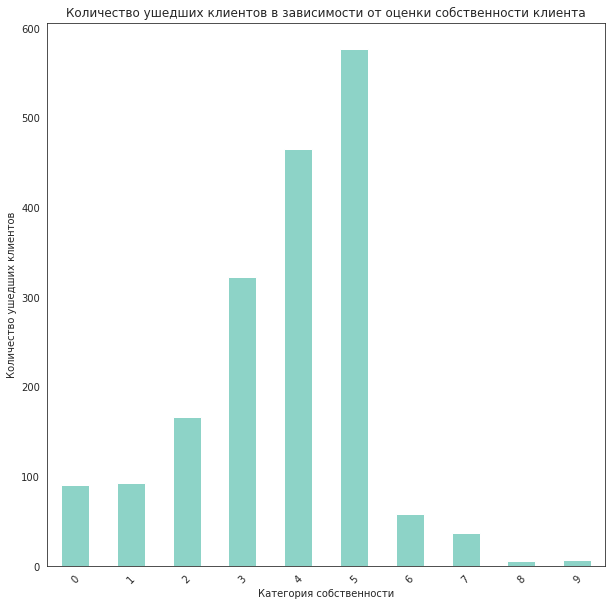

'% ушедших клиентов в зависимости от оценки собственности'

equity
0     3.52
1    12.05
2    15.87
3    21.00
4    25.26
5    30.19
6    36.02
7    46.84
8    35.29
9    53.85
Name: user_id, dtype: float64

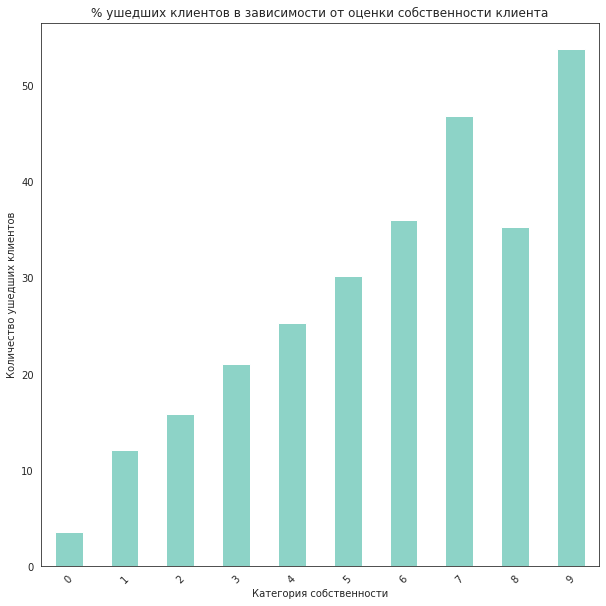

In [30]:
df_eq_tot = df.groupby('equity')['user_id'].count()
display(df_eq_tot)
df_eq = df.query('churn == 1').groupby('equity')['user_id'].count()
#Абсолютные величины
display('Количество ушедших клиентов в зависимости от оценки собственности',df_eq)
ax = df_eq.plot(kind = 'bar', x = 'equity',  figsize=(10,10), grid=False,title = 'Количество ушедших клиентов в зависимости от оценки собственности клиента')
plt.xlabel('Категория собственности')
plt.ylabel('Количество ушедших клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()
#Относительные величины
display('% ушедших клиентов в зависимости от оценки собственности',round(df_eq/df_eq_tot*100,2))

ax1 = round(df_eq/df_eq_tot*100,2).plot(kind = 'bar', x = 'equity',  figsize=(10,10), grid=False,title = '% ушедших клиентов в зависимости от оценки собственности клиента')
plt.xlabel('Категория собственности')
plt.ylabel('Количество ушедших клиентов')
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment ='center')
plt.show()

**Несмотря на то,что в абсолютных значениях максимальный отток клиентов со средней оценкой собственности (равной 5) - 577 человек, относительный показетель оттока у этой категории клиентов средний - 30%. Сильно высокий процент (более 53%) оттока у клиентов с оценкой собственности в 9 баллов. Несотря на то, что общее количество таких клиентов невелико, возможно стоит серьёзно задуматься, как их удерживать. Клиенты, чья собственность оценена на 0,самые "верные" - всего 3,5% ушедших. Возможно, это объясняется боязнью клиентов отказа на их обслуживание в других кредитных организациях.**

##### Неактивные клиенты

'Количество неактивных клиентов в зависимости от оценки собственности'

equity
0    1163
1     374
2     553
3     751
4     876
5     902
6      69
7      29
8       6
9       7
Name: user_id, dtype: int64

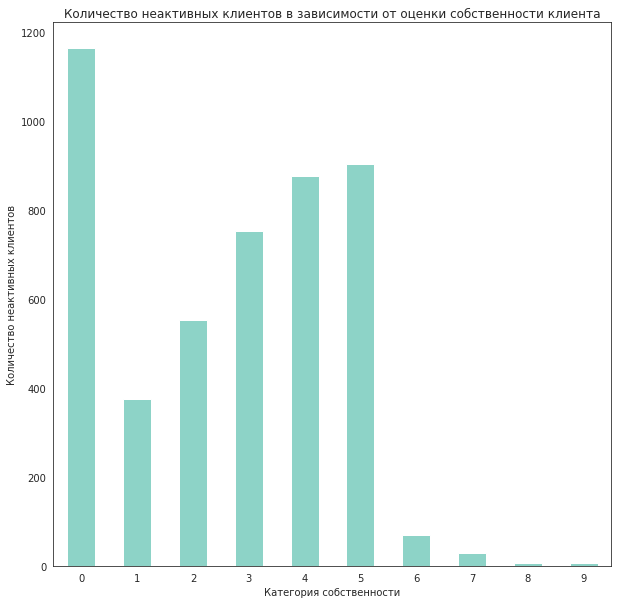

'% неактивных клиентов в зависимости от оценки собственности'

equity
0    45.54
1    48.45
2    52.87
3    48.99
4    47.58
5    47.20
6    42.86
7    36.71
8    35.29
9    53.85
Name: user_id, dtype: float64

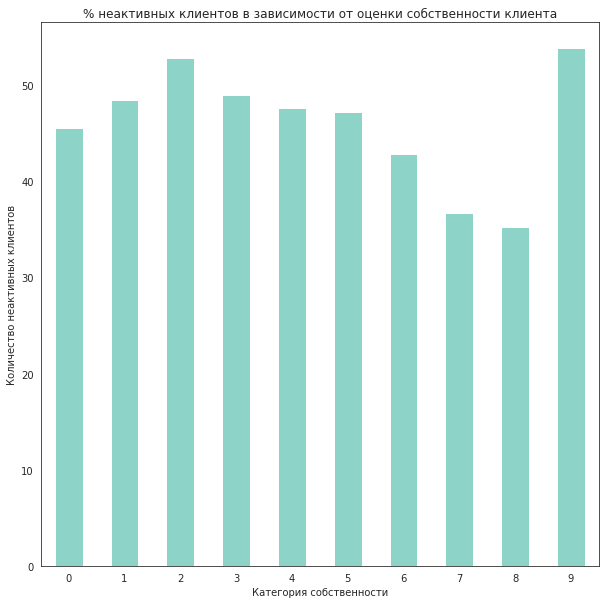

In [31]:
df_eq_ac = df.query('last_activity == 0').groupby('equity')['user_id'].count()
#Абсолютные величины
display('Количество неактивных клиентов в зависимости от оценки собственности',df_eq_ac)
ax = df_eq_ac.plot(kind = 'bar', x = 'equity',  figsize=(10,10), grid=False,title = 'Количество неактивных клиентов в зависимости от оценки собственности клиента')
plt.xlabel('Категория собственности')
plt.ylabel('Количество неактивных клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()
#Относительные величины
display('% неактивных клиентов в зависимости от оценки собственности',round(df_eq_ac/df_eq_tot*100,2))

ax1 = round(df_eq_ac/df_eq_tot*100,2).plot(kind = 'bar',   figsize=(10,10), grid=False,title = '% неактивных клиентов в зависимости от оценки собственности клиента')

plt.xlabel('Категория собственности')
plt.ylabel('Количество неактивных клиентов')
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()

**Количество неактивных клиентов больше всего среди тех, чья собственность оценена на 0, но относительный показатель у данной категории ниже, чем у клиентов с оценкой собственности в 1,2,3,4,5,9. Самый высокий относительный показатель неактивных пользователей среди, видимо, VIP персон с собственность, оценённой на 9. Более 53% неактивно среди них впоследнее время. Странно, что при этом клиенты с собственностью на 8 - самые активные (только 35% в последнее время неактивно).**

#### В зависимости от количества баллов  кредитного скорринга 

##### Ушедшие клиенты

score_cat
3    5098
4    2409
2    2243
1     177
Name: user_id, dtype: int64

'Количество ушедших клиентов в зависимости от кредитного скоринга'

score_cat
3    1181
4     425
2     215
1       0
Name: user_id, dtype: int64

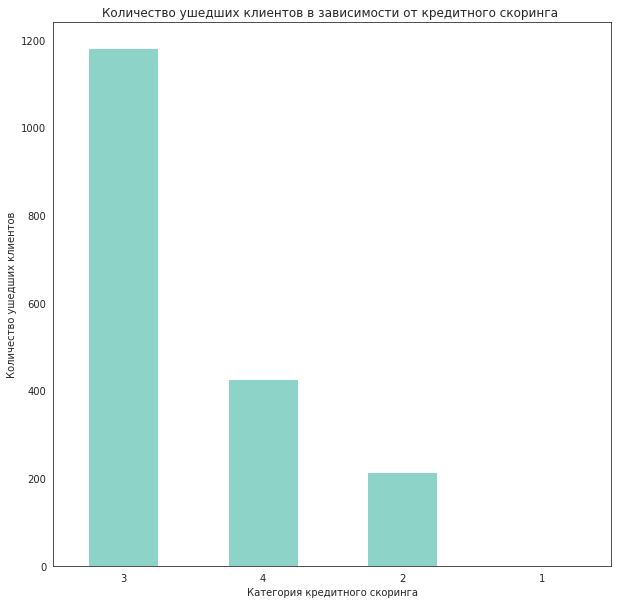

'% ушедших клиентов в зависимости от кредитного скоринга'

score_cat
3    23.17
4    17.64
2     9.59
1     0.00
Name: user_id, dtype: float64

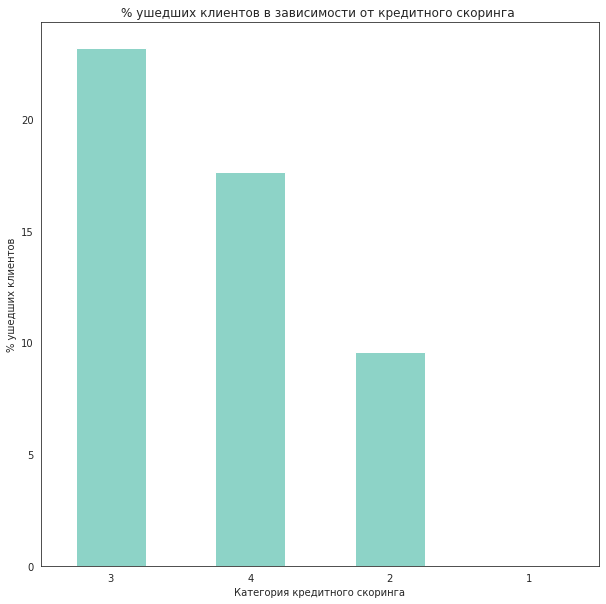

In [32]:
df_sc_tot = df.groupby('score_cat')['user_id'].count().sort_values(ascending = False)
display(df_sc_tot)
#Абсолютные значения
df_sc = df.query('churn == 1').groupby('score_cat')['user_id'].count().sort_values(ascending = False)
display('Количество ушедших клиентов в зависимости от кредитного скоринга',df_sc)
ax = df_sc.plot(kind = 'bar', x = 'score_cat',  figsize=(10,10), grid=False,title = 'Количество ушедших клиентов в зависимости от кредитного скоринга ')
plt.xlabel('Категория кредитного скоринга')
plt.ylabel('Количество ушедших клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()
#Относительные значения
display('% ушедших клиентов в зависимости от кредитного скоринга',round(df_sc/df_sc_tot*100,2))
ax1 = round(df_sc/df_sc_tot*100,2).plot(kind = 'bar', x = 'score_cat',  figsize=(10,10), grid=False,title = '% ушедших клиентов в зависимости от кредитного скоринга ')
plt.xlabel('Категория кредитного скоринга')
plt.ylabel('% ушедших клиентов')
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()

**Среди клиентов с кредитным скорингом от до 700 нет ушедших (надо отместить, что клиентов таких мало - всего 178). Чаще всего уходят клиенты с кредитным скорингом от 800 до 900 - чуть более 23% потерь. На вором месте те, чей кредитный скоринг от 900 и выше. Среди тех, чей кредитный скоринг ниже 800 потери клиентов малы - не более 10%**

##### Неактивные клиенты

'Количество неактивных клиентов в зависимости от кредитного скоринга'

score_cat
3    2478
4    1158
2    1029
1      65
Name: user_id, dtype: int64

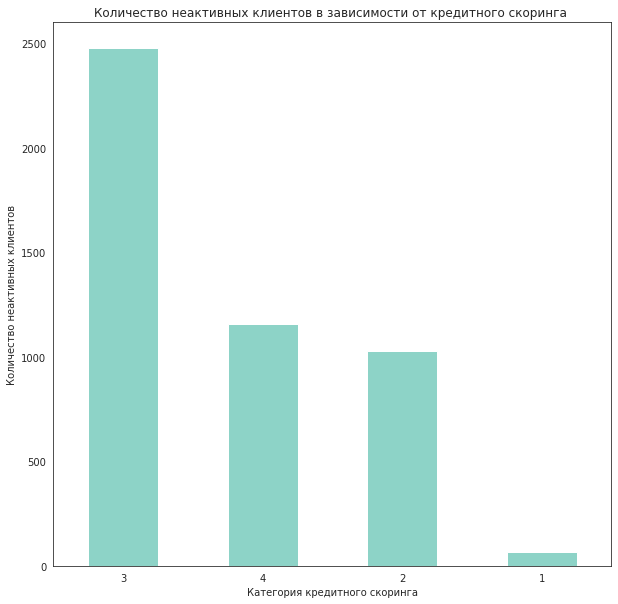

'% неактивных клиентов в зависимости от кредитного скоринга'

score_cat
3    48.61
4    48.07
2    45.88
1    36.72
Name: user_id, dtype: float64

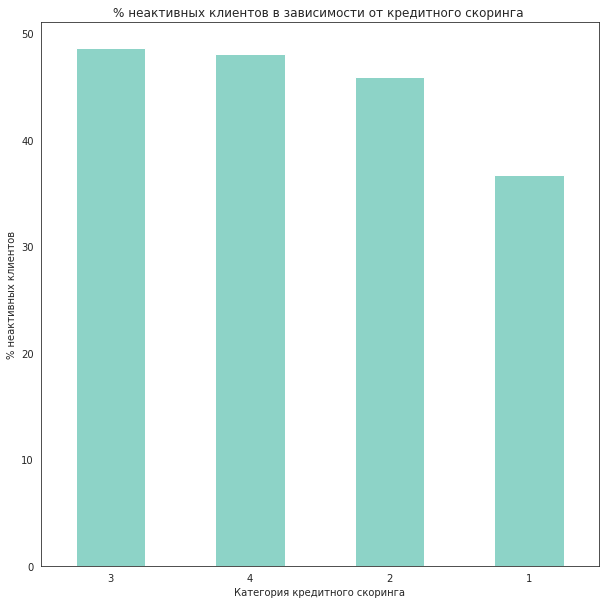

In [33]:

#Абсолютные значения
df_sc1 = df.query('last_activity == 0').groupby('score_cat')['user_id'].count().sort_values(ascending = False)
display('Количество неактивных клиентов в зависимости от кредитного скоринга',df_sc1)
ax = df_sc1.plot(kind = 'bar', x = 'score_cat',  figsize=(10,10), grid=False,title = 'Количество неактивных клиентов в зависимости от кредитного скоринга ')
plt.xlabel('Категория кредитного скоринга')
plt.ylabel('Количество неактивных клиентов')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()
#Относительные значения
display('% неактивных клиентов в зависимости от кредитного скоринга',round(df_sc1/df_sc_tot*100,2))
ax1 = round(df_sc1/df_sc_tot*100,2).plot(kind = 'bar', x = 'score_cat',  figsize=(10,10), grid=False,title = '% неактивных клиентов в зависимости от кредитного скоринга ')
plt.xlabel('Категория кредитного скоринга')
plt.ylabel('% неактивных клиентов')
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()

**Больше всего неактивных клиентов с кредитным скорингом от 800 до 900 (2490 чел или 48,68%), на втором месте те, чей кредитный скоринг превышает 900( 48%). Самые активные клиенты с кредитным скорингом до 700.**

## Выявление сегментов клиетов с высоким риском оттока

### Cформируем сегмент в зависимости от пола, возраста и баланса на счёте

#### Посмотрим, как распределяется количество ушедших и оставшихся клиентов в зависимоти от возраста и пола клиента

In [34]:
df_seg1 = df.groupby(['age_category','gender','churn'])['user_id'].count().reset_index()
display(df_seg1)

,age_category,gender,churn,user_id
0,молодежь,Ж,0,1123
1,молодежь,Ж,1,217
2,молодежь,М,0,1429
3,молодежь,М,1,476
4,взрослые,Ж,0,2397
5,взрослые,Ж,1,394
6,взрослые,М,0,2192
7,взрослые,М,1,674
8,пенсионеры,Ж,0,796
9,пенсионеры,Ж,1,27


In [35]:
#Создадим столбец с относительными показателя
df_seg1['user_id_%'] = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(df_seg1['user_id'])):
    if i % 2 == 0:
        df_seg1['user_id'][i] = df_seg1['user_id'][i]
        tot = df_seg1['user_id'][i]+df_seg1['user_id'][i+1]
        
        df_seg1['user_id_%'][i] =  round(df_seg1['user_id'][i]/tot*100,2)
    else:
        df_seg1['user_id'][i] = df_seg1['user_id'][i]
        df_seg1['user_id_%'][i] =  round(df_seg1['user_id'][i]/tot*100,2)
    
display(df_seg1)

/tmp/ipykernel_127/71481795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg1['user_id'][i] = df_seg1['user_id'][i]
/tmp/ipykernel_127/71481795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg1['user_id_%'][i] =  round(df_seg1['user_id'][i]/tot*100,2)
/tmp/ipykernel_127/71481795.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg1['user_id'][i] = df_seg1['user_id'][i]
/tmp/ipykernel_127/71481795.py:11: Setti

,age_category,gender,churn,user_id,user_id_%
0,молодежь,Ж,0,1123,83
1,молодежь,Ж,1,217,16
2,молодежь,М,0,1429,75
3,молодежь,М,1,476,24
4,взрослые,Ж,0,2397,85
5,взрослые,Ж,1,394,14
6,взрослые,М,0,2192,76
7,взрослые,М,1,674,23
8,пенсионеры,Ж,0,796,96
9,пенсионеры,Ж,1,27,3


In [1]:
fig =px.bar(df_seg1,x = 'age_category', y = 'user_id',color = 'gender', title = 'Количество клиентов по возрастам и полу c разбивкой на количество ушедших', labels={'age_category':'Возрастная категория', 'gender':'Пол','user_id':'Количество клиентов','user_id_%':'Процент клиентов','churn':'Уходит(1) или нет(0)'},facet_row="churn")
fig.update_layout(barmode='group')
fig.show()

NameError: name 'px' is not defined

In [37]:
fig =px.bar(df_seg1,x = 'age_category', y = 'user_id_%',color = 'gender', title = '% клиентов по возрастам и полу c разбивкой на количество ушедших', labels={'age_category':'Возрастная категория', 'gender':'Пол','user_id':'Количество клиентов','user_id_%':'Процент клиентов','churn':'Уходит(1) или нет(0)'},facet_row="churn")
fig.update_layout(barmode='group')
fig.show()

**Мужчины чаще уходят, чем женщины. Самая большая группа риска: взрослые мужчины от 35 до 60 лет. Самые надежные клиенты - женщины на пенсии (страше 60 лет)**

#### Посмотрим среди мужчин на соотношение баланса лицевого счёта  на показателя ухода . 

In [38]:
df_seg_1 = df.query('gender == "М" ')[['balance', 'churn','user_id','age_category']]
df_seg_1_count = df_seg_1.groupby(['age_category','churn'])['user_id'].count().reset_index()
df_seg_1_count_b = df_seg_1.groupby(['age_category','churn'])['balance'].median().reset_index()
df_seg_1_count = pd.merge(df_seg_1_count,df_seg_1_count_b, on = ('age_category','churn'))
df_seg_1_count['total'] = [0,0,0,0,0,0]
for i in range(len(df_seg_1_count['user_id'])):
    if i%2 ==0:
        df_seg_1_count['total'][i] = df_seg_1_count['user_id'][i]+df_seg_1_count['user_id'][i+1]
    else:
        df_seg_1_count['total'][i] =df_seg_1_count['total'][i-1]
        
df_seg_1_count['%total']  = round(df_seg_1_count['user_id']/df_seg_1_count['total']*100,2)
display(df_seg_1,df_seg_1_count)


/tmp/ipykernel_127/3035166253.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_127/3035166253.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,balance,churn,user_id,age_category
4,174.00,1,157978,молодежь
5,863687.24,0,202305,взрослые
8,1206337.87,0,211686,взрослые
10,NaN,0,148929,взрослые
11,NaN,0,172184,взрослые
...,...,...,...,...
9992,179765.62,1,167165,взрослые
9994,370912.79,1,114186,взрослые
9995,78144.65,0,120553,молодежь
9996,NaN,0,139170,взрослые


,age_category,churn,user_id,balance,total,%total
0,молодежь,0,1429,325102.840,1905,75.01
1,молодежь,1,476,665018.885,1905,24.99
2,взрослые,0,2192,561174.490,2866,76.48
3,взрослые,1,674,923204.750,2866,23.52
4,пенсионеры,0,169,592481.380,202,83.66
5,пенсионеры,1,33,786315.640,202,16.34


In [39]:
fig =px.bar(df_seg_1_count,x= '%total', y = ['balance','churn'],color = 'age_category', title = '% мужчин в зависимости от медианного баланса счёта', labels={'age_category':'Возрастная категория', '%total':'% ушедших и оставшихся','gender':'Пол','value':'Медианный баланс счёта','balance':'Медианное значение баланса лицевого счёта','user_id':'Количество клиентов','total':'Всего чел.','user_id_%':'Процент клиентов','churn':'Уходит(1) или нет(0)'},facet_col='total')
fig.update_layout(barmode='group')
fig.show()

**Процент ушедших мужчин в возрасте от 35 до 60 лет довольно высок ~ 25%. При этом у ушедших баланс лицевого счёта сильно выше, чем у оставшихся во всех возрастных категориях**

#### Посмотрим среди женщин на соотношение баланса лицевого счёта  на показателя ухода . 

In [40]:
df_seg_1w = df.query('gender == "Ж" ')[['balance', 'churn','user_id','age_category']]
df_seg_1_countw = df_seg_1w.groupby(['age_category','churn'])['user_id'].count().reset_index()
df_seg_1_count_bw = df_seg_1w.groupby(['age_category','churn'])['balance'].median().reset_index()
df_seg_1_countw = pd.merge(df_seg_1_countw,df_seg_1_count_bw, on = ('age_category','churn'))
df_seg_1_countw['total'] = [0,0,0,0,0,0]
for i in range(len(df_seg_1_countw['user_id'])):
    if i%2 ==0:
        df_seg_1_countw['total'][i] = df_seg_1_countw['user_id'][i]+df_seg_1_countw['user_id'][i+1]
    else:
        df_seg_1_countw['total'][i] =df_seg_1_countw['total'][i-1]
        
df_seg_1_countw['%total']  = round(df_seg_1_countw['user_id']/df_seg_1_countw['total']*100,2)
display(df_seg_1w,df_seg_1_countw)


/tmp/ipykernel_127/1675936126.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_127/1675936126.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,balance,churn,user_id,age_category
0,59214.82,1,183012,молодежь
1,850594.33,0,146556,взрослые
2,NaN,0,120722,молодежь
3,1524746.26,1,225363,взрослые
6,405042.44,0,177259,взрослые
...,...,...,...,...
9989,637403.26,0,215485,пенсионеры
9991,326619.71,0,122366,взрослые
9993,NaN,0,219924,взрослые
9998,865457.97,0,148700,пенсионеры


,age_category,churn,user_id,balance,total,%total
0,молодежь,0,1123,368388.080,1340,83.81
1,молодежь,1,217,613434.630,1340,16.19
2,взрослые,0,2397,514993.235,2791,85.88
3,взрослые,1,394,861300.445,2791,14.12
4,пенсионеры,0,796,594008.285,823,96.72
5,пенсионеры,1,27,600185.590,823,3.28


In [41]:
fig =px.bar(df_seg_1_countw,x= '%total', y = ['balance','churn'],color = 'age_category', title = '% женщин в зависимости от медианного баланса счёта', labels={'age_category':'Возрастная категория', '%total':'% ушедших и оставшихся','gender':'Пол','value':'Медианный баланс счёта','balance':'Медианное значение баланса лицевого счёта','user_id':'Количество клиентов','total':'Всего чел.','user_id_%':'Процент клиентов','churn':'Уходит(1) или нет(0)'},facet_col='total')
fig.update_layout(barmode='group')
fig.show()

**Прослеживается та же закономерность, что и у мужчин - баланс лицевого счёта ушедших клиентов женщин выше, чем у оставшихся, при этом больше всего ушедших клиентов среди молодёжи, а самая большая разница в счетах у взрослого начеления.**

**Можно сделать вывод, что охотней остаются клиенты с меньшим балансом на счету. Богатые клиенты, видимо, не находят должной поддержки и предпочитают менять банк. Считаю, что можно выделить первый "проблемный" сегмент : обеспеченные мужчины в возрасте от 35 до 60 лет.**

### Cформируем сегменты в зависимости от пола, возраста и количества продуктов, которыми пользуется клиент

#### Пенсионеры

In [45]:
df_seg_2_pen = df.query('age_category == "пенсионеры"').pivot_table(index = ['products','gender'], columns = 'churn', values ='user_id', aggfunc = 'count').reset_index()
df_seg_2_pen['total']=df_seg_2_pen[1] + df_seg_2_pen[0]
df_seg_2_pen['%total']=round(df_seg_2_pen[1]/df_seg_2_pen['total']*100,2)
display('Всего клиентов в сегменте:',df_seg_2_pen[['products','gender','total']])
#display(df_seg_2_pen)

'Всего клиентов в сегменте:'

churn,products,gender,total
0,0,Ж,NaN
1,1,Ж,213.0
2,1,М,69.0
3,2,Ж,443.0
4,2,М,102.0
5,3,Ж,164.0
6,3,М,27.0
7,4,Ж,NaN
8,4,М,4.0


In [46]:
fig =px.bar(df_seg_2_pen,x ='products', y = '%total',color = 'gender', title = '% ушедших пенсионеров в зависимости от количества продуктов', labels={'age_category':'Возрастная категория', '%total':'Процент от общего количества в сегменте','gender':'Пол','products':'Количество продуктов','balance':'Медианной значени баланса лицевого счёта','user_id':'Количество клиентов','user_id_%':'Процент клиентов','churn':'Уходит(1) или нет(0)'})
fig.update_layout(barmode='group')
fig.show()

**Чем больше продуктов использует клиент,тем выше процент оттока. Причём среди мужчин отток сильно выше, чем у женщин. 75% пенсионеров-мужчин с 4мя продуктами перестали быть клинтами.**

#### Взрослые

In [47]:
df_seg_2_vz = df.query('age_category == "взрослые"').pivot_table(index = ['products','gender'], columns = 'churn', values ='user_id', aggfunc = 'count').reset_index()
df_seg_2_vz['total']=df_seg_2_vz[1] + df_seg_2_vz[0]
df_seg_2_vz['%total']=round(df_seg_2_vz[1]/df_seg_2_vz['total']*100,2)
display('Всего клиентов в сегменте:',df_seg_2_vz[['products','gender','total']])
#display(df_seg_2_vz)

'Всего клиентов в сегменте:'

churn,products,gender,total
0,1,Ж,880
1,1,М,994
2,2,Ж,1484
3,2,М,1425
4,3,Ж,299
5,3,М,281
6,4,Ж,120
7,4,М,160
8,5,Ж,8
9,5,М,6


In [48]:
fig =px.bar(df_seg_2_vz,x ='products', y = '%total',color = 'gender', title = '% ушедших взрослых в зависимости от количества продуктов', labels={'age_category':'Возрастная категория', '%total':'Процент от общего количества в сегменте','gender':'Пол','products':'Количество продуктов','balance':'Медианной значени баланса лицевого счёта','user_id':'Количество клиентов','user_id_%':'Процент клиентов','churn':'Уходит(1) или нет(0)'})
fig.update_layout(barmode='group')
fig.show()

**Отток среди мужчин значительно выше, чем у женщин. Самый большой процент ушедших клиентов среди тех, что использовали 4 продукта: ~72% среди мужчин и ~59% среди женщин. Клиенты с 5 продуктами уходят чуть реже, но отток тоже высок: у мужчин 50%, у женщин 37,5%.**

#### Молодежь

In [49]:
df_seg_2_m = df.query('age_category == "молодежь"').pivot_table(index = ['products','gender'], columns = 'churn', values ='user_id', aggfunc = 'count').reset_index()
df_seg_2_m['total']=df_seg_2_m[1] + df_seg_2_m[0]
df_seg_2_m['%total']=round(df_seg_2_m[1]/df_seg_2_m['total']*100,2)
display('Всего клиентов в сегменте:',df_seg_2_m[['products','gender','total']])
#display(df_seg_2_m)

'Всего клиентов в сегменте:'

churn,products,gender,total
0,1,Ж,426
1,1,М,724
2,2,Ж,721
3,2,М,906
4,3,Ж,130
5,3,М,134
6,4,Ж,56
7,4,М,132
8,5,Ж,7
9,5,М,9


In [50]:
fig =px.bar(df_seg_2_m,x ='products', y = '%total',color = 'gender', title = '% ушедших клиентов до 35 лет в зависимости от количества продуктов', labels={'age_category':'Возрастная категория', '%total':'Процент от общего количества в сегменте','gender':'Пол','products':'Количество продуктов','balance':'Медианной значени баланса лицевого счёта','user_id':'Количество клиентов','user_id_%':'Процент клиентов','churn':'Уходит(1) или нет(0)'})
fig.update_layout(barmode='group')
fig.show()

**Самый проблемный сегмент продолжает проследиваться - клиенты с 4 продуктами: показатель оттока среди молодых мужчин ~62%, среди женщин ~48%**

**В целом по сементу изходя из количества продуктов на клиента можно сделать вывод, что больше всего риску ухода подвержены мужчины с 4мя продуктами. Отток таких клиентов превышает 60%**

### Выделим сегмент в зависимости от наличия кредитной карты и количества баллов кредитного скорринга

#### Клиенты без кредитной карты

In [51]:

df_seg3_cr0 = df.query('credit_card ==0').pivot_table(columns ='churn', index = 'score_cat', values = 'user_id', aggfunc = 'count').reset_index()
df_seg3_cr0['total'] = df_seg3_cr0[0]+df_seg3_cr0[1]
df_seg3_cr0['%total'] = round(df_seg3_cr0[1]/df_seg3_cr0['total']*100,2)
df_seg3_cr1 = df.query('credit_card ==1').pivot_table(columns ='churn', index = 'score_cat', values = 'user_id', aggfunc = 'count').reset_index()
df_seg3_cr1['total'] = df_seg3_cr1[0]+df_seg3_cr1[1]
df_seg3_cr1['%total'] = round(df_seg3_cr1[1]/df_seg3_cr1['total']*100,2)
display('Всего людей ,без кредитной карты в зависимоти от кредитного скоринга',df_seg3_cr0[['score_cat','total']] )

display(df_seg3_cr0 )

'Всего людей ,без кредитной карты в зависимоти от кредитного скоринга'

churn,score_cat,total
0,1,0
1,2,568
2,3,1852
3,4,758


churn,score_cat,0,1,total,%total
0,1,0,0,0,NaN
1,2,521,47,568,8.27
2,3,1318,534,1852,28.83
3,4,521,237,758,31.27


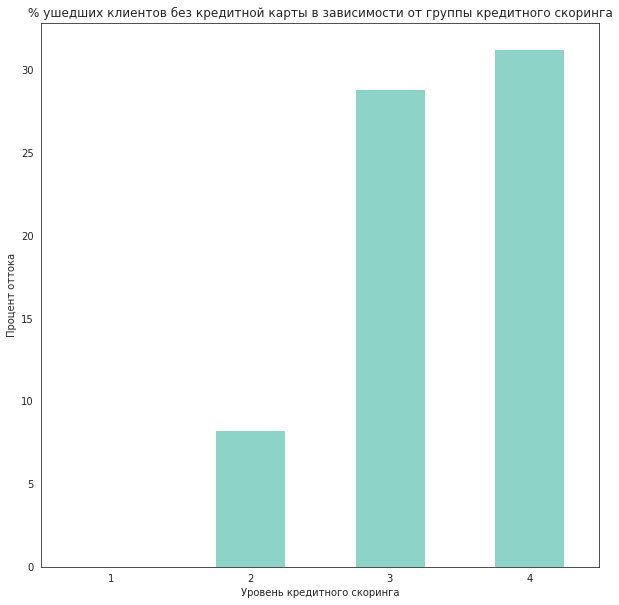

In [52]:
ax = df_seg3_cr0.plot(kind = 'bar', x = 'score_cat', y = '%total',legend = False, figsize=(10,10), grid=False,title = '% ушедших клиентов без кредитной карты в зависимости от группы кредитного скоринга')
plt.xlabel('Уровень кредитного скоринга')
plt.ylabel('Процент оттока')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()

**Всего 3178 клиентов без кредитной карты.Среди них самый высокий отток у людей с кредитным скорингом выше 900 баллов - чуть выше 31%**

#### Клиенты с кредитной картой

In [53]:
df_seg3_cr1 = df.query('credit_card ==1').pivot_table(columns ='churn', index = 'score_cat', values = 'user_id', aggfunc = 'count').reset_index()
df_seg3_cr1['total'] = df_seg3_cr1[0]+df_seg3_cr1[1]
df_seg3_cr1['%total'] = round(df_seg3_cr1[1]/df_seg3_cr1['total']*100,2)

display('Всего людей с кредитной картой в зависимоти от кредитного скоринга',df_seg3_cr1[['score_cat','total']] )
display(df_seg3_cr1 )

'Всего людей с кредитной картой в зависимоти от кредитного скоринга'

churn,score_cat,total
0,1,177
1,2,1675
2,3,3246
3,4,1651


churn,score_cat,0,1,total,%total
0,1,177,0,177,0.00
1,2,1507,168,1675,10.03
2,3,2599,647,3246,19.93
3,4,1463,188,1651,11.39


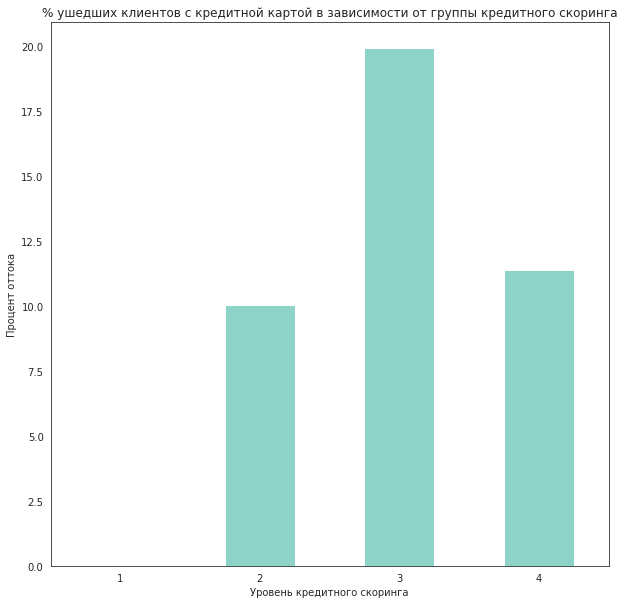

In [54]:
ax = df_seg3_cr1.plot(kind = 'bar', x = 'score_cat', y = '%total',legend = False, figsize=(10,10), grid=False,title = '% ушедших клиентов с кредитной картой в зависимости от группы кредитного скоринга')
plt.xlabel('Уровень кредитного скоринга')
plt.ylabel('Процент оттока')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()

**Клиентов с кредитной картой в 2 с лишним раза больше, чем без (6749 человек против 3178). Максимальный отток среди них (~20%) у тех, чей кредитный скоринг в пределах от 800 до 900**

### Посмотрим, влияет ли уровень заработной платы на отток клиетов

In [55]:
seg_sal1 = df.query('salary <50000' ).groupby(['city','churn'])['user_id'].count().reset_index()
print(seg_sal1)
display('%Оттока по городам у клиентов с заработной платой ниже 50000', 'В Ростове:', round(seg_sal1['user_id'][1]/(seg_sal1['user_id'][0]+seg_sal1['user_id'][1])*100,2),
'В Рыбинске',round(seg_sal1['user_id'][3]/(seg_sal1['user_id'][2]+seg_sal1['user_id'][3])*100,2),
'В Ярославле',round(seg_sal1['user_id'][5]/(seg_sal1['user_id'][4]+seg_sal1['user_id'][5])*100,2))



        city  churn  user_id
0     Ростов      0      227
1     Ростов      1       30
2    Рыбинск      0      287
3    Рыбинск      1       48
4  Ярославль      0      504
5  Ярославль      1       97


'%Оттока по городам у клиентов с заработной платой ниже 50000'

'В Ростове:'

11.67

'В Рыбинске'

14.33

'В Ярославле'

16.14

In [56]:
seg_sal2 = df.query('salary >=50000 and salary<80000' ).groupby(['city','churn'])['user_id'].count().reset_index()
print(seg_sal2)
display('%Оттока по городам у клиентов с заработной платой от 50000 до 80000', 'В Ростове:', round(seg_sal2['user_id'][1]/(seg_sal2['user_id'][0]+seg_sal2['user_id'][1])*100,2),
'В Рыбинске',round(seg_sal2['user_id'][3]/(seg_sal2['user_id'][2]+seg_sal2['user_id'][3])*100,2),
'В Ярославле',round(seg_sal2['user_id'][5]/(seg_sal2['user_id'][4]+seg_sal2['user_id'][5])*100,2))

        city  churn  user_id
0     Ростов      0      222
1     Ростов      1       50
2    Рыбинск      0      368
3    Рыбинск      1       59
4  Ярославль      0      722
5  Ярославль      1      135


'%Оттока по городам у клиентов с заработной платой от 50000 до 80000'

'В Ростове:'

18.38

'В Рыбинске'

13.82

'В Ярославле'

15.75

In [57]:
seg_sal3 = df.query('salary >=80000 and salary<100000' ).groupby(['city','churn'])['user_id'].count().reset_index()
print(seg_sal3)
display('%Оттока по городам у клиентов с заработной платой от 80000 до 10000', 'В Ростове:', round(seg_sal3['user_id'][1]/(seg_sal3['user_id'][0]+seg_sal3['user_id'][1])*100,2),
'В Рыбинске',round(seg_sal3['user_id'][3]/(seg_sal3['user_id'][2]+seg_sal3['user_id'][3])*100,2),
'В Ярославле',round(seg_sal3['user_id'][5]/(seg_sal3['user_id'][4]+seg_sal3['user_id'][5])*100,2))


        city  churn  user_id
0     Ростов      0      143
1     Ростов      1       36
2    Рыбинск      0      303
3    Рыбинск      1       49
4  Ярославль      0      503
5  Ярославль      1      122


'%Оттока по городам у клиентов с заработной платой от 80000 до 10000'

'В Ростове:'

20.11

'В Рыбинске'

13.92

'В Ярославле'

19.52

In [58]:
seg_sal4 = df.query('salary >=100000 and salary<130000' ).groupby(['city','churn'])['user_id'].count().reset_index()
print(seg_sal4)
display('%Оттока по городам у клиентов с заработной платой от 10000 до 130000', 'В Ростове:', round(seg_sal4['user_id'][1]/(seg_sal4['user_id'][0]+seg_sal4['user_id'][1])*100,2),
'В Рыбинске',round(seg_sal4['user_id'][3]/(seg_sal4['user_id'][2]+seg_sal4['user_id'][3])*100,2),
'В Ярославле',round(seg_sal4['user_id'][5]/(seg_sal4['user_id'][4]+seg_sal4['user_id'][5])*100,2))

        city  churn  user_id
0     Ростов      0      166
1     Ростов      1       52
2    Рыбинск      0      356
3    Рыбинск      1       88
4  Ярославль      0      711
5  Ярославль      1      190


'%Оттока по городам у клиентов с заработной платой от 10000 до 130000'

'В Ростове:'

23.85

'В Рыбинске'

19.82

'В Ярославле'

21.09

In [59]:
seg_sal5 = df.query('salary >= 130000' ).groupby(['city','churn'])['user_id'].count().reset_index()
print(seg_sal5)
display('%Оттока по городам у клиентов с заработной платой выше 130000', 'В Ростове:', round(seg_sal5['user_id'][1]/(seg_sal5['user_id'][0]+seg_sal5['user_id'][1])*100,2),
'В Рыбинске',round(seg_sal5['user_id'][3]/(seg_sal5['user_id'][2]+seg_sal5['user_id'][3])*100,2),
'В Ярославле',round(seg_sal5['user_id'][5]/(seg_sal5['user_id'][4]+seg_sal5['user_id'][5])*100,2))

        city  churn  user_id
0     Ростов      0      394
1     Ростов      1      101
2    Рыбинск      0      897
3    Рыбинск      1      187
4  Ярославль      0     2303
5  Ярославль      1      577


'%Оттока по городам у клиентов с заработной платой выше 130000'

'В Ростове:'

20.4

'В Рыбинске'

17.25

'В Ярославле'

20.03

In [60]:
data = {'city':['Ростов','Рыбинск','Ярославль'],'Зарплата <50000':[11.67,14.33,16.14],'50000<=Зарплата<80000':[18.38,13.82,15.75],'80000<=Зарплата<100000':[20.11,13.92,19.52],'100000<=Зарплата<130000':[23.85,19.82,21.09],'Зарплата>=130000':[20.4,17.25,20.03]}
seg_salary =pd.DataFrame(data)
display('%Оттока по городам в зависимости от уровня заработной платы',seg_salary)

'%Оттока по городам в зависимости от уровня заработной платы'

,city,Зарплата <50000,50000<=Зарплата<80000,80000<=Зарплата<100000,100000<=Зарплата<130000,Зарплата>=130000
0,Ростов,11.67,18.38,20.11,23.85,20.40
1,Рыбинск,14.33,13.82,13.92,19.82,17.25
2,Ярославль,16.14,15.75,19.52,21.09,20.03


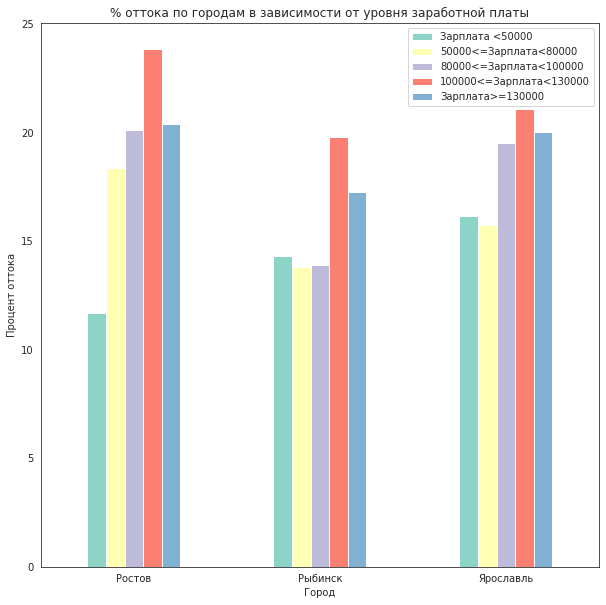

In [61]:
ax = seg_salary.plot(kind = 'bar', x = 'city', figsize=(10,10), grid=False,title = '% оттока по городам в зависимости от уровня заработной платы')
plt.xlabel('Город')
plt.ylabel('Процент оттока')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 360,horizontalalignment ='center')
plt.show()

**По всем городам самый большой отток клиентов с заработными платами от 100000 до 130000 руб. С заработными платами выше 130 тыс.руб. показатель оттока снижается незначительно**

**Исходя из медианных значений заработных плат во всех городах выявляется одна и та же закономерность: уходят клиенты с более высокими заработными платами. Ещё один показатель того, что богатых клиентов что-то не устраивает**

### Выделим сегмент в зависимости от пола и оценки собственности клиента

In [64]:
seg_5 = df.pivot_table(index ='churn',columns = ['equity','gender'], values = 'user_id', aggfunc = 'count').T
seg_5['total'] = seg_5[0]+seg_5[1]
seg_5['%total'] = round(seg_5[1]/seg_5['total'] *100,2)
seg_5 =seg_5.reset_index()
display(seg_5)


churn,equity,gender,0,1,total,%total
0,0,Ж,1138,39,1177,3.31
1,0,М,1326,51,1377,3.70
2,1,Ж,365,29,394,7.36
3,1,М,314,64,378,16.93
4,2,Ж,484,65,549,11.84
5,2,М,396,101,497,20.32
6,3,Ж,703,118,821,14.37
7,3,М,508,204,712,28.65
8,4,Ж,787,166,953,17.42
9,4,М,589,299,888,33.67


In [65]:
fig =px.bar(seg_5,y ='%total', x = 'equity',color = 'total', title = 'Отток клиектов в зависимости от оценки собственности', labels={'age_category':'Возрастная категория','city':'Город','salary':'Медианная заработная плата', '%total':'Процент оттока','gender':'Пол','products':'Количество продуктов','balance':'Медианной значени баланса лицевого счёта','user_id':'Количество клиентов','user_id_%':'Процент клиентов','total':'Всего в сегменте','equity':'Оценка собственности клиента','churn':'Уходит(1) или нет(0)'},facet_col='gender')
fig.update_layout(barmode='group')
fig.show()

**Показатель оттока у мужчин сильно превышает отток женщин начиная с оценки собственности в 2. Причём,чем выше оценка собственности мужчин, тем больший % оттока. Клинты мужчины с показателями собственности 7,8,9 уходят более, чем в 50% случаев. Среди женщин половина перестаёт быть клиентами только с показателями собственности в 9 баллов. Надо отметить, что клиентов с оценкой собственности выше 7 в принципе очень мало (всего 14 женщин и 16 мужчин). И они не задерживаются в банке**

### Изучим активность в посленее время в зависимости от баланса на счёте и наличия кредитной карты

In [66]:
#Сформируем таблицу для упрощения дальнейшего исследования
seg6 = df.groupby(['last_activity','churn','credit_card'])['user_id'].count().reset_index()
seg6_b = df.groupby(['last_activity','churn','credit_card'])['balance'].median().reset_index()
seg6 = pd.merge(seg6,seg6_b,on=('last_activity','churn','credit_card'))
display(seg6)

,last_activity,churn,credit_card,user_id,balance
0,0,0,0,1232,575089.530
1,0,0,1,2956,463072.675
2,0,1,0,204,1138072.500
3,0,1,1,338,485660.135
4,1,0,0,1128,502491.930
5,1,0,1,2790,428579.225
6,1,1,0,614,925290.050
7,1,1,1,665,685626.040


#### Неактивные клиенты 

In [67]:
seg6_na =seg6.query('last_activity == 0')
seg6_na['%users'] = round(seg6_na['user_id']/seg6_na['user_id'].sum()*100,2)
display(seg6_na)
display('Всего клиентов в сегменте',seg6_na['user_id'].sum())

/tmp/ipykernel_127/3332503733.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,last_activity,churn,credit_card,user_id,balance,%users
0,0,0,0,1232,575089.530,26.05
1,0,0,1,2956,463072.675,62.49
2,0,1,0,204,1138072.500,4.31
3,0,1,1,338,485660.135,7.15


'Всего клиентов в сегменте'

4730

In [68]:
fig =px.bar(seg6_na,y ='%users', x= 'credit_card',color = 'balance', title = 'Отток неактивных клиектов в зависимости от баланса лицевого счёта и наличия кредитки', labels={'age_category':'Возрастная категория','city':'Город','salary':'Медианная заработная плата', '%total':'Процент оттока','gender':'Пол','products':'Количество продуктов','balance':'Медианное значение баланса лицевого счёта','user_id':'Количество клиентов','user_id_%':'Процент клиентов','total':'Всего в сегменте','equity':'Оценка собственности клиента','churn':'Уходит(1) или нет(0)','%users':'Процент клиентов','credit_card':'Наличие кредитки'},facet_row="churn")
fig.update_layout(barmode='group')
fig.show()

#### Активные клиенты 

In [69]:
seg6_a =seg6.query('last_activity == 1')
seg6_a['%users'] = round(seg6_a['user_id']/seg6_a['user_id'].sum()*100,2)
#display(seg6_na)
display('Всего клиентов в сегменте',seg6_a['user_id'].sum())

/tmp/ipykernel_127/3639640825.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Всего клиентов в сегменте'

5197

In [70]:
fig =px.bar(seg6_a,y ='%users', x= 'credit_card',color = 'balance', title = 'Отток активных клиектов в зависимости от баланса лицевого счёта и наличия кредитки', labels={'age_category':'Возрастная категория','city':'Город','salary':'Медианная заработная плата', '%total':'Процент оттока','gender':'Пол','%users':'Процент клиентов','credit_card':'Наличие кредитки','products':'Количество продуктов','balance':'Медианное значение баланса лицевого счёта','user_id':'Количество клиентов','user_id_%':'Процент клиентов','total':'Всего в сегменте','equity':'Оценка собственности клиента','churn':'Уходит(1) или нет(0)'},facet_row="churn")
fig.update_layout(barmode='group')

fig.show()

**Самый высокий медианный показатель лицевого счёта у ушедших клиентов без наличия кредитной карты, причём у неактивных этот показатель выше, чем у активных и превышает 1,1 млн. руб. Состояние лицевого счёта у клиентов с кредитными картами скоромнее, чем без.При этом у ушедших активных клиентов с кредиткой баланс выше,чем у неактивных. Медианные показатели лицевого счёта у текущих клиентов  более чем в 2 раза ниже, чем у аналогичных ушедших за исключением неактивных клиентов с кредитной картой, но и такие текущие клиенты "беднее" ушедших. Выделить особо рисковый сегмент тут сложно, так как показатели ухода в принципе небольшие ( не превышают 13%). Однако можно смело говорить о том, что отток активных клиентов больше, чем отток неактивных, при этом клиенты с кредиткой уходят чаще,чем без, хотя их баланс ниже,чем у клиентов без кредитных карт. Отток активный клиентов с кредитной картой - 12,8%, неактивный - 7,15%. Отток активный клиентов без кредитной карты - ~12%,у неактиных всего 4,3%**

* Новый сегмент 1. Пользователи с кредитной картой,балансом счёта более 100000 и пользующиеся тремя и более продуктами.

,churn,user_id,total,%total
0,0,337,667,50.52
1,1,330,667,49.48


'Всего клиентов в сегменте'

667

'% оттока в сегменте'

49.48

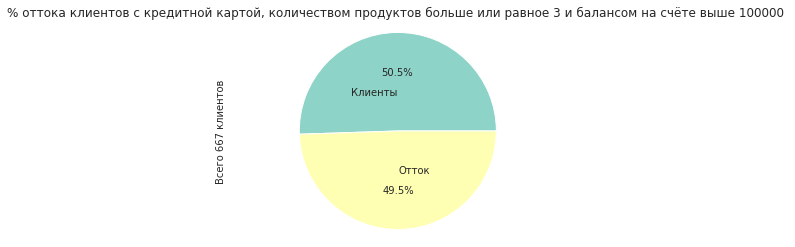

In [71]:
seg_1new = df.query('balance >=100000 and credit_card ==1 and  products >=3').groupby('churn')['user_id'].count().reset_index()
seg_1new['total'] = seg_1new['user_id'].sum()
seg_1new['%total'] = round(seg_1new['user_id']/seg_1new['total']*100,2)
display(seg_1new)

display('Всего клиентов в сегменте',seg_1new['total'][1])
display('% оттока в сегменте',seg_1new['%total'][1])
ax =seg_1new.plot(kind = 'pie', y ='user_id',autopct='%1.1f%%', labeldistance = 0.4, legend = False,labels=['Клиенты','Отток'],title ='% оттока клиентов с кредитной картой, количеством продуктов больше или равное 3 и балансом на счёте выше 100000 ')
ax.axis("equal")
plt.ylabel('Всего 667 клиентов')
plt.show()

* Новый сегмент 2. Выделим сегмент с клиентами - мужчинами с заработной платой от 100000 до 130000 и кредитным скорингом выше 800

,churn,user_id,total,%total
0,0,389,567,68.61
1,1,178,567,31.39


'Всего клиентов в сегменте'

567

'% оттока в сегменте'

31.39

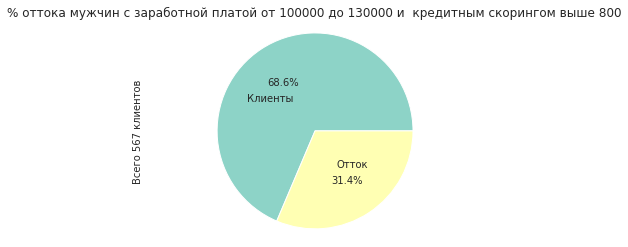

In [72]:
seg_2new = df.query(' gender == "М"  and salary >=100000 and salary < 130000 and score_cat >= 3').groupby('churn')['user_id'].count().reset_index()
seg_2new['total'] = seg_2new['user_id'].sum()
seg_2new['%total'] = round(seg_2new['user_id']/seg_2new['total']*100,2)
display(seg_2new)

display('Всего клиентов в сегменте',seg_2new['total'][1])
display('% оттока в сегменте',seg_2new['%total'][1])
ax =seg_2new.plot(kind = 'pie', y ='user_id',autopct='%1.1f%%', labeldistance = 0.4, legend = False,labels=['Клиенты','Отток'],title ='% оттока мужчин с заработной платой от 100000 до 130000 и  кредитным скорингом выше 800')
ax.axis("equal")
plt.ylabel('Всего 567 клиентов')
plt.show()

* Новый сегмент 3. Выделим сегмент с клиентами без кредитной карты и оценкой собственности выше или равной 5

,churn,user_id,total,%total
0,0,547,898,60.91
1,1,351,898,39.09


'Всего клиентов в сегменте'

898

'% оттока в сегменте'

39.09

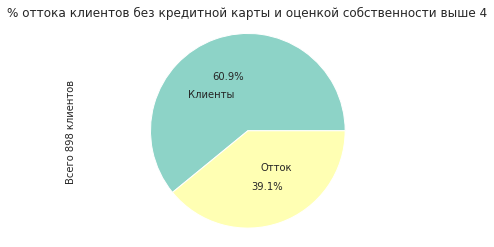

In [73]:
seg_3new = df.query('credit_card ==0 and equity>= 5').groupby('churn')['user_id'].count().reset_index()
seg_3new['total'] = seg_3new['user_id'].sum()
seg_3new['%total'] = round(seg_3new['user_id']/seg_3new['total']*100,2)
display(seg_3new)

display('Всего клиентов в сегменте',seg_3new['total'][1])
display('% оттока в сегменте',seg_3new['%total'][1])
ax =seg_3new.plot(kind = 'pie', y ='user_id',autopct='%1.1f%%', labeldistance = 0.4, legend = False,labels=['Клиенты','Отток'],title ='% оттока клиентов без кредитной карты и оценкой собственности выше 4')
ax.axis("equal")
plt.ylabel('Всего 898 клиентов')
plt.show()

* Новый сегмент 4. Выделим сегмент с клиентами без кредитной карты и оценкой собственности выше или равной 5

,churn,user_id,total,%total
0,0,348,723,48.13
1,1,375,723,51.87


'Всего клиентов в сегменте'

0    723
1    723
Name: total, dtype: int64

'% оттока в сегменте'

51.87

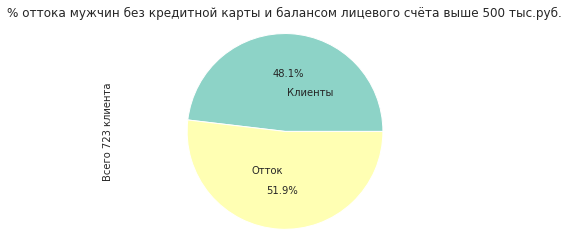

In [74]:

seg_4new = df.query('balance>=500000 and credit_card ==0 and  gender =="М"').groupby('churn')['user_id'].count().reset_index()
seg_4new['total'] = seg_4new['user_id'].sum()
seg_4new['%total'] = round(seg_4new['user_id']/seg_4new['total']*100,2)
display(seg_4new)

display('Всего клиентов в сегменте',seg_4new['total'])
display('% оттока в сегменте',seg_4new['%total'][1])
ax =seg_4new.plot(kind = 'pie', y ='user_id',autopct='%1.1f%%', labeldistance = 0.4, legend = False,labels=['Клиенты','Отток'],title ='% оттока мужчин без кредитной карты и балансом лицевого счёта выше 500 тыс.руб.')
ax.axis("equal")
plt.ylabel('Всего 723 клиента')
plt.show()

* Новый сегмент 5. Выделим сегмент клиентов до 60 лет без кредитной карты и балансом лицевого счёта выше 1 млн.руб.

,churn,user_id,total,%total
0,0,398,779,51.09
1,1,381,779,48.91


'Всего клиентов в сегменте'

0    779
1    779
Name: total, dtype: int64

'% оттока в сегменте'

48.91

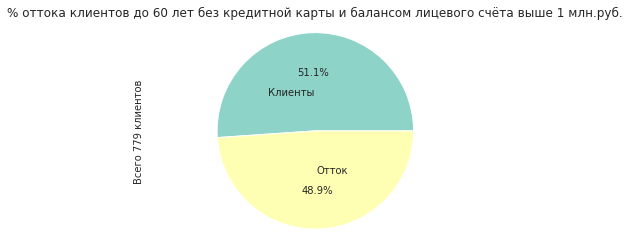

In [75]:
seg_5new = df.query('balance >=1000000 and credit_card ==0 and age_category !="пенсионеры"').groupby('churn')['user_id'].count().reset_index()
seg_5new['total'] = seg_5new['user_id'].sum()
seg_5new['%total'] = round(seg_5new['user_id']/seg_5new['total']*100,2)
display(seg_5new)

display('Всего клиентов в сегменте',seg_5new['total'])
display('% оттока в сегменте',seg_5new['%total'][1])
ax =seg_5new.plot(kind = 'pie', y ='user_id',autopct='%1.1f%%', labeldistance = 0.4, legend = False,labels=['Клиенты','Отток'],title ='% оттока клиентов до 60 лет без кредитной карты и балансом лицевого счёта выше 1 млн.руб.')
ax.axis("equal")
plt.ylabel('Всего 779 клиентов')
plt.show()


**В порядке снижения показателя оттока выявлены следующие "проблемные" сегменты клиентов:**
 - клиенты без кредитной карты и оценкой собственности выше или равной 5 - 51.9% оттока  
 - клиентов до 60 лет без кредитной карты и балансом лицевого счёта выше 1 млн.руб. - 49.9 оттока%
 - клиенты с кредитной картой, количеством продуктов больше или равное 3 и балансом на счёте выше 1000000 - 49.5% оттока
 - клиенты без кредитной карты и оценкой собственности выше или равной 5 - 39.1% оттока
 - клиенты - мужчинами с заработной платой от 100000 до 130000 и кредитным скорингом выше 800 - 31.4% 




## Выдвижение и проверка гипотез

### Проверка первой гипотезы

Выдвинем гипотезу:
- H0 - Высокий баланс на счёте (более 1100000 руб.) не влияет на отток клиетов
- H1 - Низкий баланс на счёте (менее 1100000 руб.) влияет на отток клиетов

*Сформируем данные для проверки гипотезы*

In [76]:

group_bal_1 = df.query('balance >=1100000 and churn ==1 ').groupby('churn')['user_id'].count().reset_index()
group_bal_1['total'] = df.query('balance <=1100000')['user_id'].count()
group_bal_2 = df.query('balance > 1100000 and churn ==1').groupby('churn')['user_id'].count().reset_index()
group_bal_2['total'] = df.query('balance >1100000')['user_id'].count()
display(group_bal_1,group_bal_2)

,churn,user_id,total
0,1,663,6057


,churn,user_id,total
0,1,663,1610


*Проведём z-тест для пропорций*

In [77]:
alpha = 0.01 #Установим уровень статистической разницы в 0.03,т.к. группы небольшие,вероятность ошибки - выше
stat, pval = proportions_ztest(
[group_bal_1['user_id'],
 group_bal_2['user_id']], 

[group_bal_1['total'],
 group_bal_2['total']]
)
print('p-значение:',pval) 

if   pval < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [8.74316058e-179]
Отвергаем нулевую гипотезу


**Не получилось подтвердить гипотезу. Можно говорить о том, что есть высокая степень вероятности в том, что крупный баланс счёта влияет на показатель ухода клиента** 

### Проверка второй гипотезы

Выдвинем гипотезу:
- Н0 - Активности клиента в последнее время влияет на вероятность оттока
- Н1 - Активности клиента в последнее время  не влияет на вероятность оттока

*Сформируем группы для проверки гипотезы*

In [78]:
group_act_1 = df.query('last_activity == 1 and churn ==1 ').groupby('churn')['user_id'].count().reset_index()
group_act_1['total'] = df.query('last_activity ==1')['user_id'].count()
group_act_2 = df.query('last_activity == 0 and churn ==1').groupby('churn')['user_id'].count().reset_index()
group_act_2['total'] = df.query('last_activity ==1')['user_id'].count()
display(group_act_1,group_act_2)

,churn,user_id,total
0,1,1279,5197


,churn,user_id,total
0,1,542,5197


*Проведём z-тест для пропорций*

In [79]:
stat, pval = proportions_ztest(
[group_act_1['user_id'],
 group_act_2['user_id']], 

[group_act_1['total'],
 group_act_2['total']]
)
print('p-значение:',pval) 

if   pval < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.23811354e-80]
Отвергаем нулевую гипотезу


**Не получилось подтвердить гипотезу. Сделаем предположение, что вероятнее вего активность в последнее время не влияет на показатель ухода.**

### Проверка третьей гипотезы

Выдвинем гипотезу:
- Н0 - Низкий уровень заработной платы (менее 20000) влияет на отток клиетов
- Н1 - Низкий уровень заработной платы (менее 20000) не влияет на отток клиетов

In [80]:
group_sal_1 = df.query('salary  <= 20000 and churn ==1 ').groupby('churn')['user_id'].count().reset_index()
group_sal_1['total'] = df.query('salary  <=20000')['user_id'].count()
group_sal_2 = df.query('salary  > 20000 and churn ==1').groupby('churn')['user_id'].count().reset_index()
group_sal_2['total'] = df.query('salary  > 20000')['user_id'].count()
display(group_act_1,group_act_2)

,churn,user_id,total
0,1,1279,5197


,churn,user_id,total
0,1,542,5197


In [81]:
stat, pval = proportions_ztest(
[group_sal_1['user_id'],
 group_sal_2['user_id']], 

[group_sal_1['total'],
 group_sal_2['total']]
)
print('p-значение:',pval) 

if   pval < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.01217114]
Не получилось отвергнуть нулевую гипотезу


**Не получилось опровергнуть нулевую гипотезу.Низкий уровень заработной платы влияет на отток клиентов**

### Проверка четвёртой  гипотезы

Выдвинем гипотезу:
- Н0 - Наличие кредитной карты влияет на отток клиетов
- Н1 - Наличие кредитной карты не влияет на отток клиетов

In [82]:
group_cred_1 = df.query('credit_card == 1 and churn ==1 ').groupby('churn')['user_id'].count().reset_index()
group_cred_1['total'] = df.query('credit_card <=10000')['user_id'].count()
group_cred_2 = df.query('credit_card == 0 and churn ==1').groupby('churn')['user_id'].count().reset_index()
group_cred_2['total'] = df.query('credit_card ==0')['user_id'].count()
display(group_act_1,group_act_2)

,churn,user_id,total
0,1,1279,5197


,churn,user_id,total
0,1,542,5197


In [83]:
stat, pval = proportions_ztest(
[group_cred_1['user_id'],
 group_cred_2['user_id']], 

[group_cred_1['total'],
 group_cred_2['total']]
)
print('p-значение:',pval) 

if   pval < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [5.5197143e-109]
Отвергаем нулевую гипотезу


**Наличие кредитной карты у клиента не оказывает существенного влияния на отток клиентов**

# Общий вывод по проекту

В ходе выполенения проекта была проведена работа по предобработке данных: приведение данных к единому стилю, обработка пропусков и дубликатов, исключение аномальных значений. 
Далее при выполнении исследовательского анализа были выделены следующие закономерности:

    - Самый большой процент ушедший клиентов в Ярославле (~19%),на втором месте Рыбинск (~18,8%). В Ростове ушедших клиентов незначительно меньше -~16%.При этом во всех городах практически половина клиентов неактивны в последее время
      
    - Чаще всего уходят взрослые мужчины в возрасте от 35 до 60 лет. Самый "стабильный" сегмент -женщины -пенсионеры (старше 60). Опять же настораживет большой процент неактивных клиентов во всех возрастных категориях (самый высокий среди взрослых 49,7%, самый низкий - среди пенсионеров (~44%))
    
    - Медианная заработная плата ушедших клиентов во всех городах превышает этот же показатель у текущих клиентов. Что говорит о том, что люди с высоким окладом склонны уходить чаще. Видимо, неполучают необходимого им сервиса и уровня обслуживания.
    
    - Закономерность ухода более обеспеченных клиентов продолжает прослеживаться: и у мужчин, и уженщин, являющихся текущими клиентами банка средний показатель собственности ниже на 1 -1,5 бала, чем у ушедших.

    - Больше всего ушедших клиентоы с кредитным скорингом от 800 до 900. Клиенты с кредитным скорингом от 600 до 700 - самые "преданные"
    
    - Самый высокий медианный показатель лицевого счёта у ушедших клиентов без наличия кредитной карты, причём у неактивных этот показатель выше, чем у активных и превышает 1,1 млн. руб.Медианные показатели лицевого счёта у текущих клиентов  более чем в 2 раза ниже, чем у аналогичных ушедших за исключением неактивных клиентов с кредитной картой, но и такие текущие клиенты "беднее" ушедших. Ещё один показатель того, что богатые клиенты "бегут" из банка.
    
    - Самые "преданные" клиенты - небогатые женщины старше 60 лет. Приятно, что они редко уходят, но врятли можно рассчитывать на процветание банка, ориентированного главным образом на такую целевую аудиторию.
    
    
 В заключении были выдвинуты и проверены гипотезы о влиянии активности и наличия кредитной карты  уклиента на вероятность ухода,которые не подтвердились. И гипотезы о влиянии низкого уровня заработной плтаы (менее 20 тысяч) и высокого баланса на счёте (более 1,1 млн. рублей) на показатель оттока, которые опровергнуть не удалось.
 
 
Исходя из всего вышеперечисленного, можно сделать вывод, что категория клиентов в наибольшей степени подверженная риску ухода - это обеспеченые мужчины в расцвете сил (35-60 лет) с балансом на счёте выше 1,1 млн рублей без кредитных карт,с высокими показателями собственноси (9) и кредитного скоринга (800-900). Рекомендую менеджеру по продукту уделить именно этой категории клиентов бОльшее внимание: возможно, разработать новый привлекательный для обеспеченных людей продукт или спецпредложения по вкладам,например; улучшить качество обслуживания и сервиса. Учитывая, что очень много клиентов в последнее время неактивны, возможно стоит им напомнить о своём существовании - сделать рассылку или обзвонить клиентов с заманчивыми предложениями) Нет прямой зависимости у неактивных клиентов и их уходом из банка, что говорит о большом потенциале этих самых неактивных клиентов.
    
    
    

**Ссылка на презентацию:** https://drive.google.com/file/d/1fv70SDXc1Y5JpLobxPETAefujyEG5fX6/view?usp=share_link